In [1]:
from sympy import *
from sympy.physics.mechanics import *
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation

init_vprinting()

In [30]:
m, I, l, g, x_pin, y_pin, tau, t = symbols('m I l g x_pin y_pin tau t')
theta1, theta2, theta3, theta4, theta5, theta6 = dynamicsymbols('theta1 theta2 theta3 theta4 theta5 theta6')

theta1_dot = diff(theta1, t)
thetq2_dot = diff(theta2, t)
theta3_dot = diff(theta3, t)
theta4_dot = diff(theta4, t)
theta5_dot = diff(theta5, t)
theta6_dot = diff(theta6, t)

theta1_ddot = diff(theta1_dot, t)
theta2_ddot = diff(theta2_dot, t)
theta3_ddot = diff(theta3_dot, t)
theta4_ddot = diff(theta4_dot, t)
theta5_ddot = diff(theta5_dot, t)
theta6_ddot = diff(theta6_dot, t)

# Displacements
r2 = Matrix([x_pin, y_pin, 0])
r3 = Matrix([-l*sin(theta1), l*cos(theta1), 0])
r5 = Matrix([0, 0, 0])

r1 = r2 - r3 + r5
r4 = r1

# Velocities
r1_dot = diff(r1, t)
r2_dot = diff(r2, t)
r3_dot = diff(r3, t)
r4_dot = diff(r4, t)
r5_dot = diff(r5, t)

# Accelerations
r1_ddot = diff(r1_dot, t)
r2_ddot = diff(r2_dot, t)
r3_ddot = diff(r3_dot, t)
r4_ddot = diff(r4_dot, t)
r5_ddot = diff(r5_dot, t)

# Forces
F1 = -m*r1_ddot
F4 = Matrix([0, -m*g, 0])

F5 = -F1 - F4
F2 = F5
F3 = -F5

# Torques
T1 = Matrix([0, 0, -I*theta1_ddot])
T4 = Matrix([0, 0, 0])
T5 = Matrix([0, 0, tau])
T6 = simplify(-r3.cross(F3))

eqn = simplify(T1 + T4 + T5 + T6)
sln = solve(eqn, [theta1_ddot, theta2_ddot, theta3_ddot, theta4_ddot, theta5_ddot, theta6_ddot])[theta1_ddot]
theta1_ddot_expr = lambdify((theta1, m, I, l, g, tau), sln)

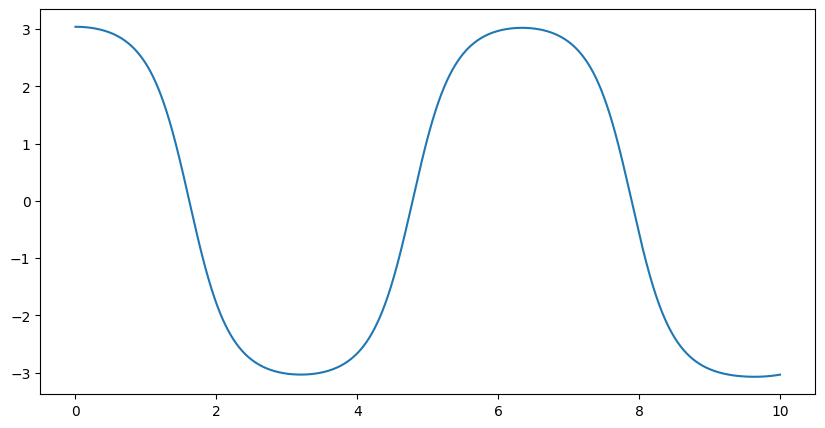

In [57]:
m = 1
l = 1
I = 1/3*m*l**2
g = 9.81

dt = 0.001
tf = 10
t = np.arange(0, tf, dt)

theta1_0 = np.pi-.1
theta1_dot_0 = 0

def ODE(t, y):
    theta1, theta1_dot = y
    theta1_ddot = theta1_ddot_expr(theta1, m, I, l, g, 0)
    return [theta1_dot, theta1_ddot]

sol = solve_ivp(ODE, [0, tf], [theta1_0, theta1_dot_0], t_eval=t)
theta1, theta1_dot = sol.y

plt.figure(figsize=(10, 5))
plt.plot(t, theta1)

In [68]:
# Graph Theory
D_T = np.array([[1, 0, -1, 1, 0],
              [0, 0, 1, 0, 1],
              [0, 1, 0, 0, -1],
              [-1, -1, 0, -1, 0]])
D_R = np.array([[1, 1, 1, 1],
                [-1, -1, -1, -1]])

D_R.T @ D_R, D_T.T @ D_T

(array([[2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2]]),
 array([[ 2,  1, -1,  2,  0],
        [ 1,  2,  0,  1, -1],
        [-1,  0,  2, -1,  1],
        [ 2,  1, -1,  2,  0],
        [ 0, -1,  1,  0,  2]]))